<font size="8" color="#ff0040"><center><strong>House Price prediction</strong></center></font>
<font size="5" color="#ff0040"><b>Content : </b></font><br>
<font size="4" color="#ffff00">Data Understanding</font><br>
<font size="4" color="#ffff00">Data Cleaning</font><br>
<font size="4" color="#ffff00">Data Exploration</font><br>
<font size="4" color="#ffff00">Analysis Techniques</font><br>
<font size="4" color="#ffff00">Visualization</font><br>

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

<font size="4" color="yellow">Import csv file</font>

In [68]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [70]:
df1.shape

(13320, 9)

In [71]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<font size="4" color="yellow">Unnecsessary columns are dropped</font>

In [72]:
df1.drop(['availability','area_type','society'], axis = 1, inplace = True)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


<font size="4" color="yellow"> Unnecsessary rows are dropped using index values</font>

In [73]:
df1.drop(df1.index[0],inplace=True)

In [74]:
df1.head()

,location,size,total_sqft,bath,balcony,price
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.0
5,Whitefield,2 BHK,1170,2.0,1.0,38.0


In [75]:
df1.location.value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

<font size="4" color="yellow">Check null values</font>

In [76]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

<font size="4" color="yellow">Drop null values</font>

In [77]:
df2= df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [78]:
df2.shape

(12709, 6)

In [79]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [80]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935


In [81]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [82]:
convert_sqft_to_num('2166')

2166.0

In [83]:
convert_sqft_to_num('2216 - 2850')

2533.0

In [84]:
convert_sqft_to_num('34.46Sq. Meter')

In [85]:
df3 = df2.copy()
df3.total_sqft = df2.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(2)

,location,size,total_sqft,bath,balcony,price
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.0


In [86]:
df3.loc[122]

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath             4.0
balcony          0.0
price          477.0
Name: 122, dtype: object

In [87]:
(3067 + 8156)/2

5611.5

<font size="4" color="yellow">Label Encoding</font>

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['location']=le.fit_transform(df3['location'])

In [89]:
df3.head()

,location,size,total_sqft,bath,balcony,price
1,303,4 Bedroom,2600.0,5.0,3.0,120.0
2,1136,3 BHK,1440.0,2.0,3.0,62.0
3,735,3 BHK,1521.0,3.0,1.0,95.0
4,694,2 BHK,1200.0,2.0,1.0,51.0
5,1208,2 BHK,1170.0,2.0,1.0,38.0


<font size="4" color="yellow">Seperate numerical and categorical values </font>

In [90]:
df3['size'] = df3['size'].astype(str)
df3['numerical_size'] = df3['size'].str.extract('(\d+)', expand=False)
df3['categorical_size'] = df3['size'].str.extract('([a-zA-Z]+)', expand=False)

In [91]:
df3.head()

,location,size,total_sqft,bath,balcony,price,numerical_size,categorical_size
1,303,4 Bedroom,2600.0,5.0,3.0,120.0,4,Bedroom
2,1136,3 BHK,1440.0,2.0,3.0,62.0,3,BHK
3,735,3 BHK,1521.0,3.0,1.0,95.0,3,BHK
4,694,2 BHK,1200.0,2.0,1.0,51.0,2,BHK
5,1208,2 BHK,1170.0,2.0,1.0,38.0,2,BHK


In [92]:
df3[['numerical_size', 'categorical_size']] = df3['size'].str.split('(\d+)', expand=True).iloc[:, 1:3]

In [93]:
df3.head()

,location,size,total_sqft,bath,balcony,price,numerical_size,categorical_size
1,303,4 Bedroom,2600.0,5.0,3.0,120.0,4,Bedroom
2,1136,3 BHK,1440.0,2.0,3.0,62.0,3,BHK
3,735,3 BHK,1521.0,3.0,1.0,95.0,3,BHK
4,694,2 BHK,1200.0,2.0,1.0,51.0,2,BHK
5,1208,2 BHK,1170.0,2.0,1.0,38.0,2,BHK


In [94]:
unique_values = df3['size'].unique()
print(unique_values)

['4 Bedroom' '3 BHK' '2 BHK' '3 Bedroom' '1 BHK' '1 RK' '4 BHK'
 '1 Bedroom' '2 Bedroom' '6 Bedroom' '8 Bedroom' '7 Bedroom' '5 BHK'
 '7 BHK' '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK'
 '11 Bedroom' '43 Bedroom' '14 BHK' '8 BHK' '12 Bedroom' '10 Bedroom'
 '13 BHK']


In [95]:
df3['numerical_size'] = df3['size'].str.extract('(\d+)', expand=False)
df3['categorical_size'] = df3['size'].str.replace('\d+', '').str.strip()

In [96]:
df3.head()

,location,size,total_sqft,bath,balcony,price,numerical_size,categorical_size
1,303,4 Bedroom,2600.0,5.0,3.0,120.0,4,4 Bedroom
2,1136,3 BHK,1440.0,2.0,3.0,62.0,3,3 BHK
3,735,3 BHK,1521.0,3.0,1.0,95.0,3,3 BHK
4,694,2 BHK,1200.0,2.0,1.0,51.0,2,2 BHK
5,1208,2 BHK,1170.0,2.0,1.0,38.0,2,2 BHK


In [97]:
df3 = df3[df3['categorical_size'].str.contains('BHK')]

In [98]:
df3.head()

,location,size,total_sqft,bath,balcony,price,numerical_size,categorical_size
2,1136,3 BHK,1440.0,2.0,3.0,62.00,3,3 BHK
3,735,3 BHK,1521.0,3.0,1.0,95.00,3,3 BHK
4,694,2 BHK,1200.0,2.0,1.0,51.00,2,2 BHK
5,1208,2 BHK,1170.0,2.0,1.0,38.00,2,2 BHK
8,775,3 BHK,1310.0,3.0,1.0,63.25,3,3 BHK


<font size="4" color="yellow">Dropped categorical size</font>

In [99]:
df3.drop(['size','categorical_size'], axis = 1, inplace = True)
df3.head()

,location,total_sqft,bath,balcony,price,numerical_size
2,1136,1440.0,2.0,3.0,62.00,3
3,735,1521.0,3.0,1.0,95.00,3
4,694,1200.0,2.0,1.0,51.00,2
5,1208,1170.0,2.0,1.0,38.00,2
8,775,1310.0,3.0,1.0,63.25,3


<font size="4" color="yellow">Coverted numerical_size into "BHK"</font>

In [100]:
df3.rename(columns={'numerical_size': 'BHK'}, inplace=True)
df3.head()

,location,total_sqft,bath,balcony,price,BHK
2,1136,1440.0,2.0,3.0,62.00,3
3,735,1521.0,3.0,1.0,95.00,3
4,694,1200.0,2.0,1.0,51.00,2
5,1208,1170.0,2.0,1.0,38.00,2
8,775,1310.0,3.0,1.0,63.25,3


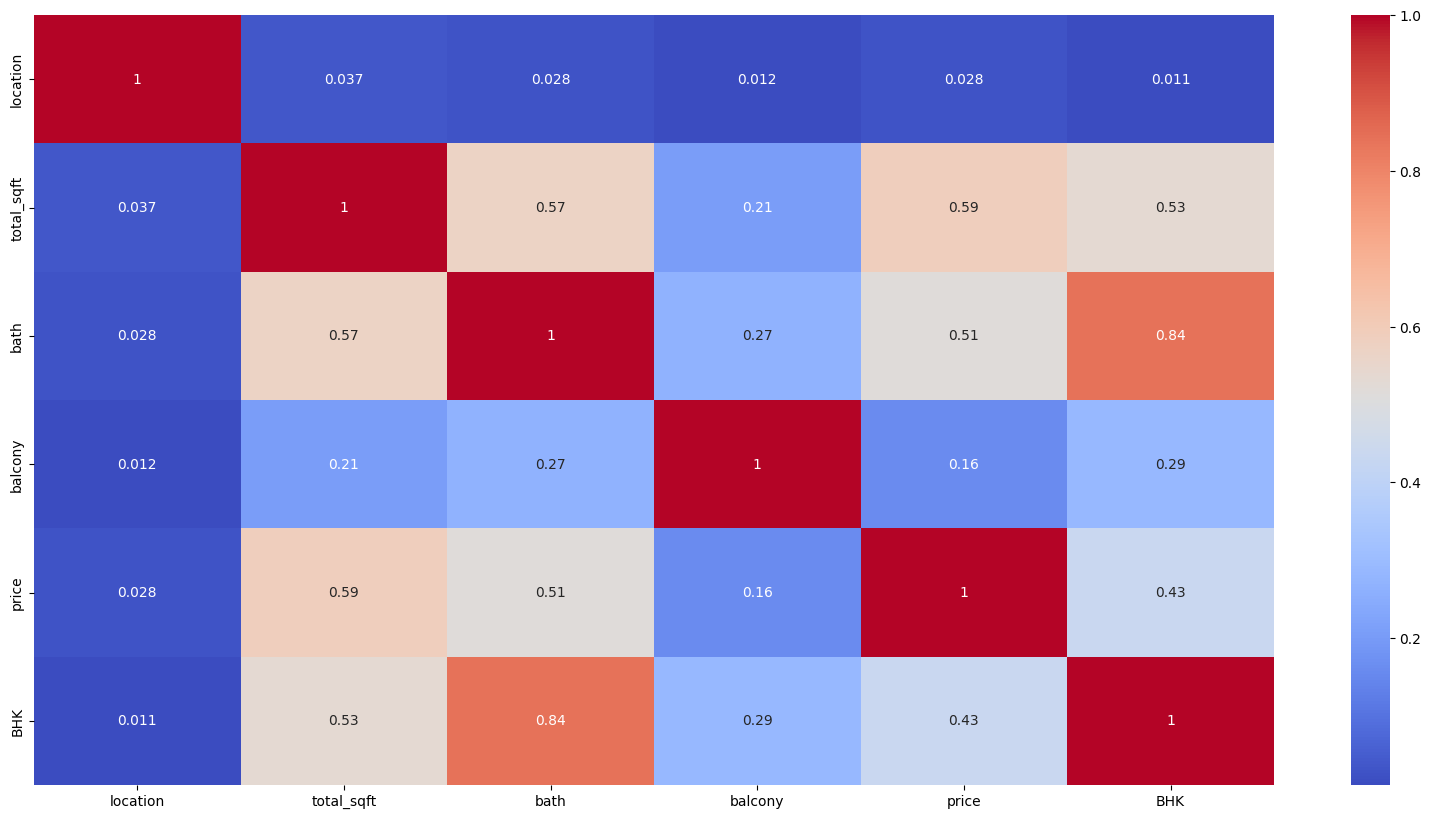

In [101]:
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<font size="4" color="#00ffff">Conclusion : Heatmap is showing the correlation between the data columns</font>

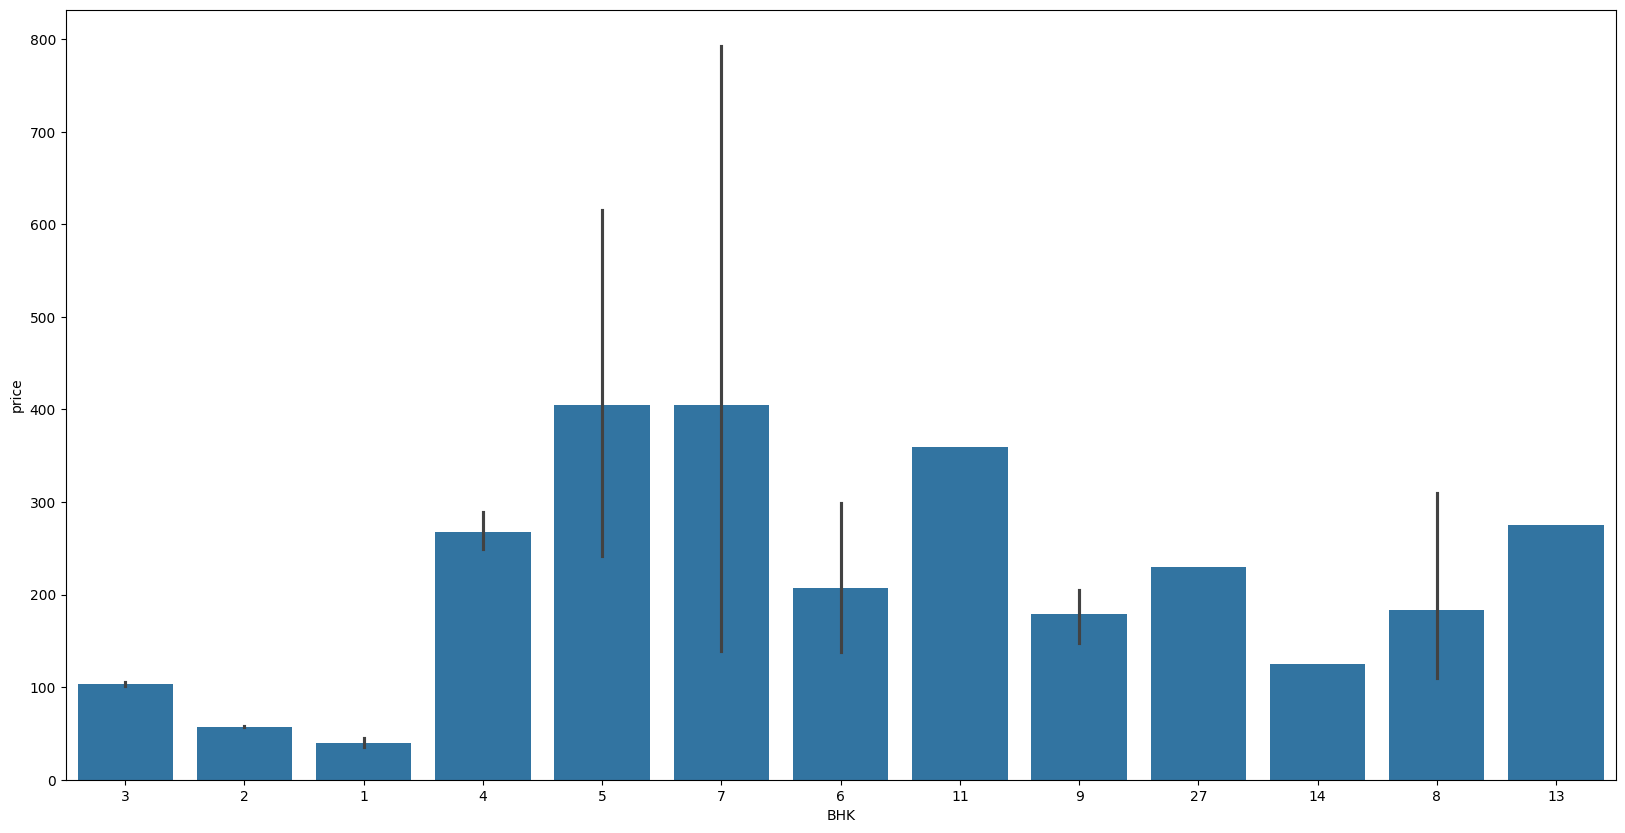

In [102]:
sns.barplot(x='BHK', y='price', data=df3)
plt.show()

<font size="4" color="#00ffff">Conclusion : Above Barplot is showing house prices are increasing with the Area</font>

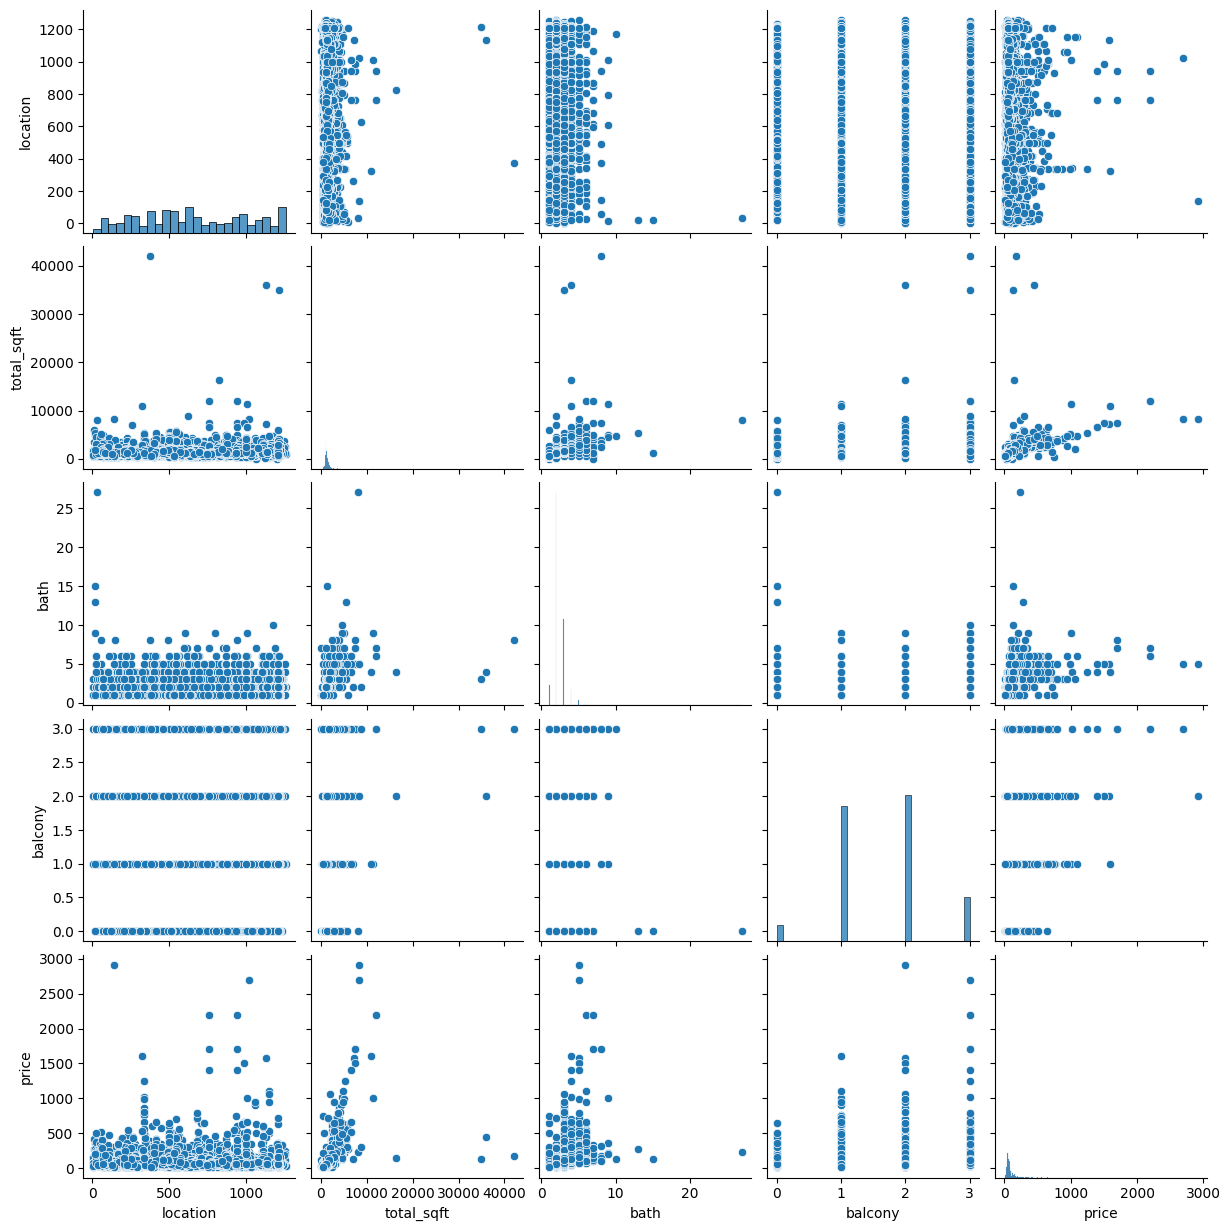

In [103]:
sns.pairplot(df3[['location','total_sqft', 'bath', 'balcony', 'price', 'BHK']])
plt.show()

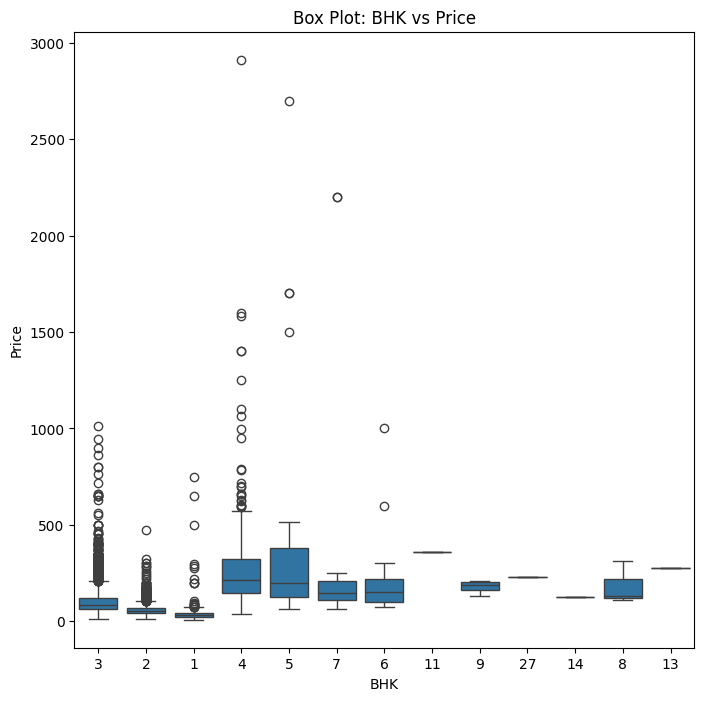

In [104]:
plt.figure(figsize=(8,8))
sns.boxplot(x='BHK', y='price', data=df3)
plt.xlabel('BHK')
plt.ylabel('Price')
plt.title('Box Plot: BHK vs Price')
plt.show()


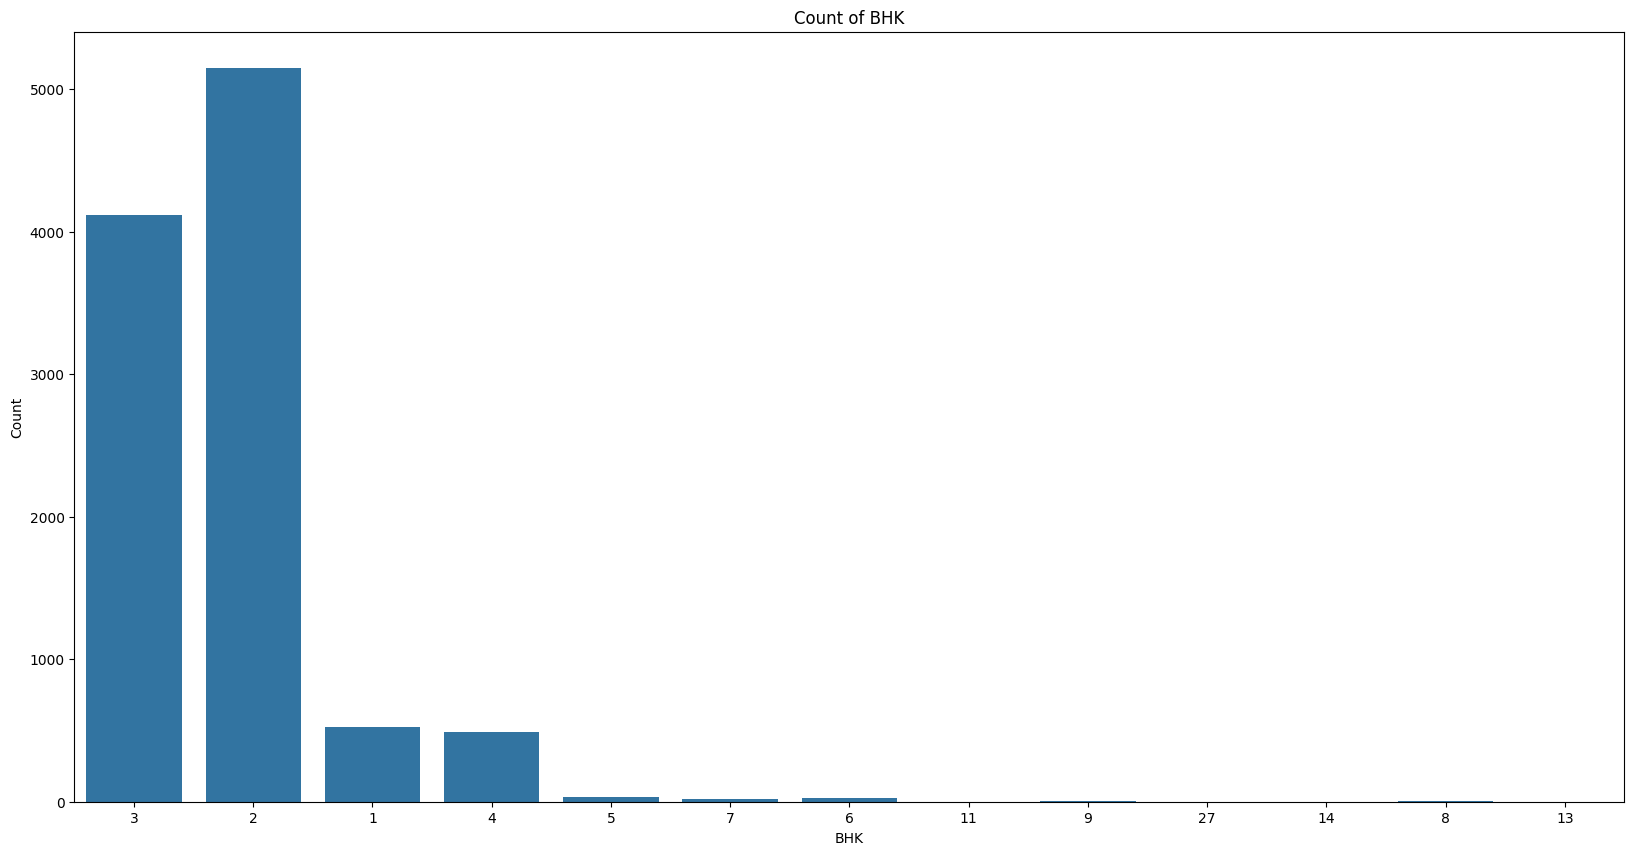

In [124]:
sns.countplot(x='BHK', data=df3)
plt.xlabel('BHK')
plt.ylabel('Count')
plt.title('Count of BHK')
plt.show()

<font size="4" color="#00ffff">Conclusion : As we can see in above countplot there are most of the houses are of 2 and 3 BHK</font>

In [106]:
df3.head()

,location,total_sqft,bath,balcony,price,BHK
2,1136,1440.0,2.0,3.0,62.00,3
3,735,1521.0,3.0,1.0,95.00,3
4,694,1200.0,2.0,1.0,51.00,2
5,1208,1170.0,2.0,1.0,38.00,2
8,775,1310.0,3.0,1.0,63.25,3


In [107]:
X = df3[['total_sqft','bath', 'balcony','BHK']]
y = df3['price']

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
df3.shape

(10364, 6)

In [120]:
y_test.shape

(3110,)

In [121]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [122]:
model.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred=model.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4262.253659190833
